# Baseball Case Study

In this project, I will use machine learning models to predict Major-League Baseball team wins per season based on baseball csv data.

Agenda:


-Importing the data

-Cleaning and Preparing the data

-Exploring and Visualizing the data

-Adding new features

-Adding one more feature using K-means clustering

-Splitting dataset into train_set and test_set

-Selecting error metric: Mean absolute error vs Mean squared error

-Linear regression model

-Ridge regression model

-Conclusion

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Importing Data

In [2]:
teams=pd.read_csv("baseball.csv")
teams

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


# Cleaning and Preparing the data

Rename columns names to dataframe

In [3]:
teams = teams.rename(columns={'W':'Wins','R':'Runs','AB':'At Bats','H':'Hits','2B':'Doubles','3B':'Triples','HR':'Homeruns','BB':'Walks','SO':'Strikeouts','SB':'Stolen Bases','RA':'Runs Allowed','ER':'Earned Runs','ERA':'Earned Run Average','CG':'Complete Games','SHO':'Shutouts','SV':'Saves','E':'Errors'})
teams

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Games,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [4]:
teams.describe()

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Games,Shutouts,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [5]:
teams.head(5)

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Games,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [6]:
teams.tail(5)

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Games,Shutouts,Saves,Errors
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [7]:
teams.columns

Index(['Wins', 'Runs', 'At Bats', 'Hits', 'Doubles', 'Triples', 'Homeruns',
       'Walks', 'Strikeouts', 'Stolen Bases', 'Runs Allowed', 'Earned Runs',
       'Earned Run Average', 'Complete Games', 'Shutouts', 'Saves', 'Errors'],
      dtype='object')

In [8]:
print(teams.head(2))

   Wins  Runs  At Bats  Hits  Doubles  Triples  Homeruns  Walks  Strikeouts  \
0    95   724     5575  1497      300       42       139    383         973   
1    83   696     5467  1349      277       44       156    439        1264   

   Stolen Bases  Runs Allowed  Earned Runs  Earned Run Average  \
0           104           641          601                3.73   
1            70           700          653                4.07   

   Complete Games  Shutouts  Saves  Errors  
0               2         8     56      88  
1               2        12     45      86  


In [9]:
len(teams)

30

# Exploring and Visualizing the data

Text(0.5, 1.0, 'histogram of wins')

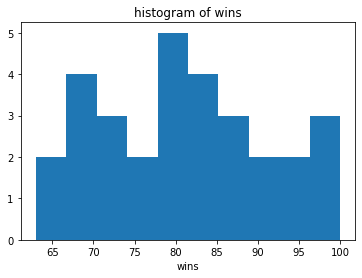

In [10]:
plt.hist(teams['Wins'])
plt.xlabel('wins')
plt.title('histogram of wins')

In [11]:
teams['Wins'].mean()

80.96666666666667

In [12]:
#create bins for each win values
def assign_win_bins(w):
    if w < 50:
        return 1
    if w >= 50 and w <= 69:
        return 2
    if w >= 70 and w <= 89:
        return 3
    if w >= 90 and w <= 109:
        return 4
    if w >= 110:
        return 5

In [13]:
#apply to the 'W' column
teams['win_bins'] = teams['Wins'].apply(assign_win_bins)
teams['win_bins']

0     4
1     3
2     3
3     3
4     3
5     4
6     3
7     3
8     3
9     3
10    3
11    3
12    3
13    3
14    2
15    4
16    4
17    4
18    2
19    2
20    4
21    3
22    3
23    2
24    2
25    4
26    3
27    3
28    3
29    2
Name: win_bins, dtype: int64

In [14]:
teams['Wins']

0      95
1      83
2      81
3      76
4      74
5      93
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: Wins, dtype: int64

In [15]:
teams['Runs']

0     724
1     696
2     669
3     622
4     689
5     891
6     764
7     713
8     644
9     748
10    751
11    729
12    661
13    656
14    694
15    647
16    697
17    689
18    655
19    640
20    683
21    703
22    613
23    573
24    626
25    667
26    696
27    720
28    650
29    737
Name: Runs, dtype: int64

Visualize wins per year colored with win_bins

In [16]:
teams.isnull().sum()

Wins                  0
Runs                  0
At Bats               0
Hits                  0
Doubles               0
Triples               0
Homeruns              0
Walks                 0
Strikeouts            0
Stolen Bases          0
Runs Allowed          0
Earned Runs           0
Earned Run Average    0
Complete Games        0
Shutouts              0
Saves                 0
Errors                0
win_bins              0
dtype: int64

Text(0, 0.5, 'Wins')

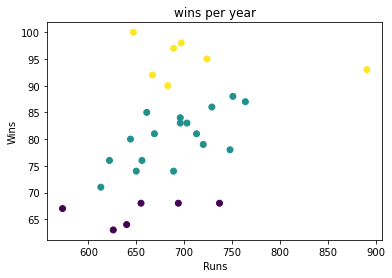

In [17]:
plt.scatter(teams['Runs'],teams['Wins'],c=teams['win_bins'])
plt.title('wins per year')
plt.xlabel('Runs')
plt.ylabel('Wins')

In [18]:
# Create new features for Runs per Game and Runs Allowed per Game
teams['R_per_game'] = teams['Runs'] / teams['Complete Games']
teams['RA_per_game'] = teams['Runs Allowed'] / teams['Complete Games']

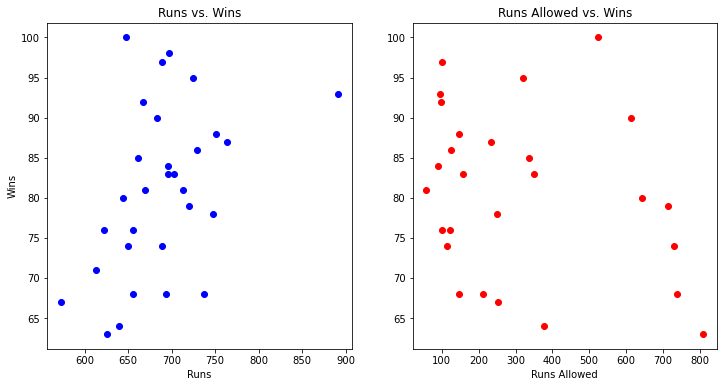

In [19]:
# Create scatter plots for runs per game vs. wins and runs allowed per game vs. wins
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.scatter(teams['Runs'], teams['Wins'], c='blue')
ax1.set_title('Runs vs. Wins')
ax1.set_ylabel('Wins')
ax1.set_xlabel('Runs')

ax2.scatter(teams['RA_per_game'], teams['Wins'], c='red')
ax2.set_title('Runs Allowed vs. Wins')
ax2.set_xlabel('Runs Allowed')

plt.show()

In [20]:
teams.corr()['Wins']

Wins                  1.000000
Runs                  0.430751
At Bats              -0.087947
Hits                  0.037612
Doubles               0.427797
Triples              -0.251118
Homeruns              0.307407
Walks                 0.484342
Strikeouts            0.111850
Stolen Bases         -0.157234
Runs Allowed         -0.812952
Earned Runs          -0.809435
Earned Run Average   -0.819600
Complete Games        0.080533
Shutouts              0.471805
Saves                 0.666530
Errors               -0.089485
win_bins              0.917736
R_per_game           -0.075385
RA_per_game          -0.254595
Name: Wins, dtype: float64

In [21]:
attributes = ['Wins', 'Runs', 'At Bats', 'Hits', 'Doubles', 'Triples', 'Homeruns',
       'Walks', 'Strikeouts', 'Stolen Bases', 'Runs Allowed', 'Earned Runs',
       'Earned Run Average', 'Complete Games', 'Shutouts', 'Saves', 'Errors']

data_attributes = teams[attributes]

# Print the first rows of `df`
print(teams.head())

   Wins  Runs  At Bats  Hits  Doubles  Triples  Homeruns  Walks  Strikeouts  \
0    95   724     5575  1497      300       42       139    383         973   
1    83   696     5467  1349      277       44       156    439        1264   
2    81   669     5439  1395      303       29       141    533        1157   
3    76   622     5533  1381      260       27       136    404        1231   
4    74   689     5605  1515      289       49       151    455        1259   

   Stolen Bases  Runs Allowed  Earned Runs  Earned Run Average  \
0           104           641          601                3.73   
1            70           700          653                4.07   
2            86           640          584                3.67   
3            68           701          643                3.98   
4            83           803          746                4.64   

   Complete Games  Shutouts  Saves  Errors  win_bins  R_per_game  RA_per_game  
0               2         8     56      88      

In [22]:
# Import necessary modules from `sklearn` 
from sklearn.cluster import KMeans
from sklearn import metrics

# Create silhouette score dictionary
s_score_dict = {}
for i in range(2,11):
    km = KMeans(n_clusters=i, random_state=1)
    l = km.fit_predict(data_attributes)
    s_s = metrics.silhouette_score(data_attributes, l)
    s_score_dict[i] = [s_s]

# Print out `s_score_dict`
print(s_score_dict)

{2: [0.19270360137794426], 3: [0.19367511526637307], 4: [0.17816626042531622], 5: [0.18749831099759726], 6: [0.17628568423970653], 7: [0.18821548798176607], 8: [0.21283257689087118], 9: [0.16887502597112486], 10: [0.1690211854286708]}


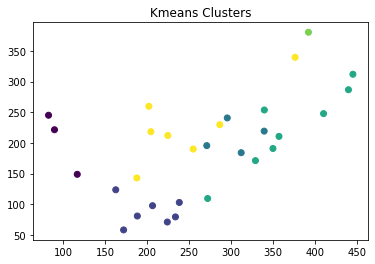

In [23]:
# Create K-means model and determine euclidian distances for each data point
kmeans_model = KMeans(n_clusters=6, random_state=1)
distances = kmeans_model.fit_transform(data_attributes)

# Create scatter plot using labels from K-means model as color
labels = kmeans_model.labels_

plt.scatter(distances[:,0], distances[:,1], c=labels)
plt.title('Kmeans Clusters')

plt.show()

In [27]:
# Add labels from K-means model to `teams` DataFrame and attributes list
teams['labels'] = labels
attributes.append('labels')

# Print the first rows of `teams`
teams.head()

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,...,Earned Runs,Earned Run Average,Complete Games,Shutouts,Saves,Errors,win_bins,R_per_game,RA_per_game,labels
0,95,724,5575,1497,300,42,139,383,973,104,...,601,3.73,2,8,56,88,4,362.000000,320.500000,4
1,83,696,5467,1349,277,44,156,439,1264,70,...,653,4.07,2,12,45,86,3,348.000000,350.000000,1
2,81,669,5439,1395,303,29,141,533,1157,86,...,584,3.67,11,10,38,79,3,60.818182,58.181818,2
3,76,622,5533,1381,260,27,136,404,1231,68,...,643,3.98,7,9,37,101,3,88.857143,100.142857,1
4,74,689,5605,1515,289,49,151,455,1259,83,...,746,4.64,7,12,35,86,3,98.428571,114.714286,0


Spliting dataset into train_set and test_set

Create a new dataframe includes only numeric columns

In [28]:
# Create new DataFrame using only variables to be included in models
numeric_cols = ['Wins', 'Runs', 'At Bats', 'Hits', 'Doubles', 'Triples', 'Homeruns',
       'Walks', 'Strikeouts', 'Stolen Bases', 'Runs Allowed', 'Earned Runs',
       'Earned Run Average', 'Complete Games', 'Shutouts', 'Saves', 'Errors']
data = teams[numeric_cols]
data.head()


,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Games,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


split data into train and test sets

In [29]:
train = data.sample(frac = 0.75, random_state=1)
test = data.loc[~data.index.isin(train.index)]

In [ ]:
# Split data DataFrame into train and test sets
train = data.sample(frac=0.75, random_state=1)
test = data.loc[~data.index.isin(train.index)]

x_train = train[attributes]
y_train = train['Wins']
x_test = test[attributes]
y_test = test['Wins']